<a href="https://colab.research.google.com/github/osebasp/ML-Applications-for-Actuarial-Science/blob/main/Ejercicio_de_clasificacion_y_generacion_de_digitos_con_MNIST_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Oscar Pulido
# Aplicaciones del aprendizaje de máquinas en Actuaría y Finanzas

El presente trabajo consiste en construir un modelo de clasificación y generación de dígitos para la base de datos de MNIST.

De acuerdo con el sitio web Papers with code, la base de datos MNIST (Modified National Institute of Standards and Technology database) está conformada una gran colección de dígitos manuscritos.Asmismo, tiene un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Es un subconjunto de la base de datos especial 3 del NIST (dígitos escritos por empleados de la Oficina del Censo de Estados Unidos) y de la base de datos especial 1 (dígitos escritos por estudiantes de secundaria), que contienen imágenes monocromas de dígitos manuscritos. Los dígitos se han normalizado en tamaño y se han centrado en una imagen de tamaño fijo.

Una vez entendido el contexto de los datos, a continuación, se presenta la composición del siguente cuaderno:

1.   Manejo y verificación de calidad de la información
2.   Exploración de la información
3.   Comprobaciones adicionales y balanceo de los datos
4.   Modelo de entrenamiento y clasificación usando Naive
     Bayes
5.   Medición de desempeño
6.   Modelo de generación de dígitos

El presente ejercicio se desarrollará en lenguaje Python.

# 1. Manejo y verificación de la calidad de la información

Antes de empezar con el proceso de modelación y tratamiento de la información, es necesario cargar las librerías que permitan el desarrollo de este proyecto. A continuación, se muestran el proceso correspondiente:

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
import random
warnings.filterwarnings("ignore")

Gracias a la extensión fetch_openml es posible importar el conjunto de datos MNIST. Como se comentó previamente, esta es una gran base de datos de dígitos manuscritos que se utiliza habitualmente para entrenar diversos sistemas de procesamiento de imágenes. En la base de datos usada se tiene un formato particular de 28x28 pixeles de acuerdo con la documentación oficial encontrada en https://paperswithcode.com/dataset/mnist. Lo anterior signfica que la base de datos está compuesta por 784 columnas que corresponden a la representación de los pixeles recien mencionados.

In [2]:
base_mnist = fetch_openml('mnist_784')
base_mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Una vez se ha importado la información, sigue un proceso de preparación de los datos. Un check inicial que se puede realizar, permite encontrar características no deseables dentro de los datos, como valores nulos, duplicados entre otros.  Asimismo, se pueden verficar las composiciones de las columnas con la ayuda de comandos como df.info():




In [3]:
try:
    base_mnist.data.astype('int').astype(int)
    # Si la conversión es exitosa, todos los valores son números enteros
    integer = True
except ValueError:
    # Si ocurre un ValueError, significa que al menos un valor no es un número entero
    integer = False

if integer:
    print("El conjunto de datos solamente contiene números enteros.")
else:
    print("El conjunto de datos no contiene exlusvamente números enteros.")


print("")

base_mnist.data.info()

print("")

print("Cantidad de valores faltantes o nulos es:", base_mnist.data.isnull().sum().sum())
print("")
print("Cantidad de valores faltantes o nulos es:", base_mnist.data.isna().sum().sum())
print("")
print("Cantidad de filas duplicadas es:", base_mnist.data.duplicated().sum())

El conjunto de datos solamente contiene números enteros.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB

Cantidad de valores faltantes o nulos es: 0

Cantidad de valores faltantes o nulos es: 0

Cantidad de filas duplicadas es: 0


El análisis anterior permite evidenciar que los datos tienen buena calidad. Vale la pena hacer comprobaciones con respecto al rango de la información como se puede ver a continuación:


In [4]:
print("cantidad de valores menores a cero:", sum(base_mnist.data.min() < 0))
print("cantidad de valores mayores a 255:", sum(base_mnist.data.max() > 255))
np.sort(base_mnist.data.stack().unique())

cantidad de valores menores a cero: 0
cantidad de valores mayores a 255: 0


array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Lo anterior permite afirmar que el conjunto de datos importado cumple con las condiciones necesarias para el desarrollo del proyecto. Ahora, se mostrará un ejercicio de exploración de la información.

# 2. Exploración de la información

Un proceso exploratorio inicial consiste en mostrar las imágenes deseadas, sin embargo, dada la naturaleza de los datos, es necesario realizar un aplanamiento de imágenes en vectores con 784 componentes (28x28 pixeles). El proceso para mostrar un dígito escrito a mano es el siguiente:

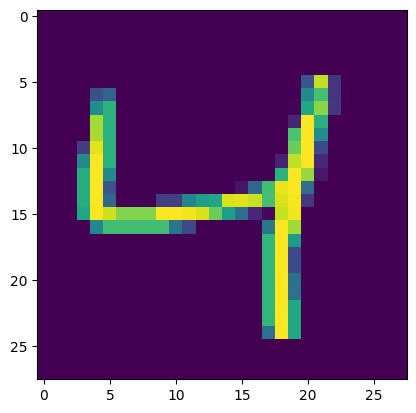

In [5]:
plt.imshow(np.reshape(np.array(base_mnist.data.loc[2]), (28, 28)))
plt.show()

Un análisis que puede ser bastante descriptivo es uno gráfico por número de columnas, sin embargo, dado que son 784 columnas, se selecciona una muestra de 25 y se presentan los histogramas de frecuencias correspondientes:

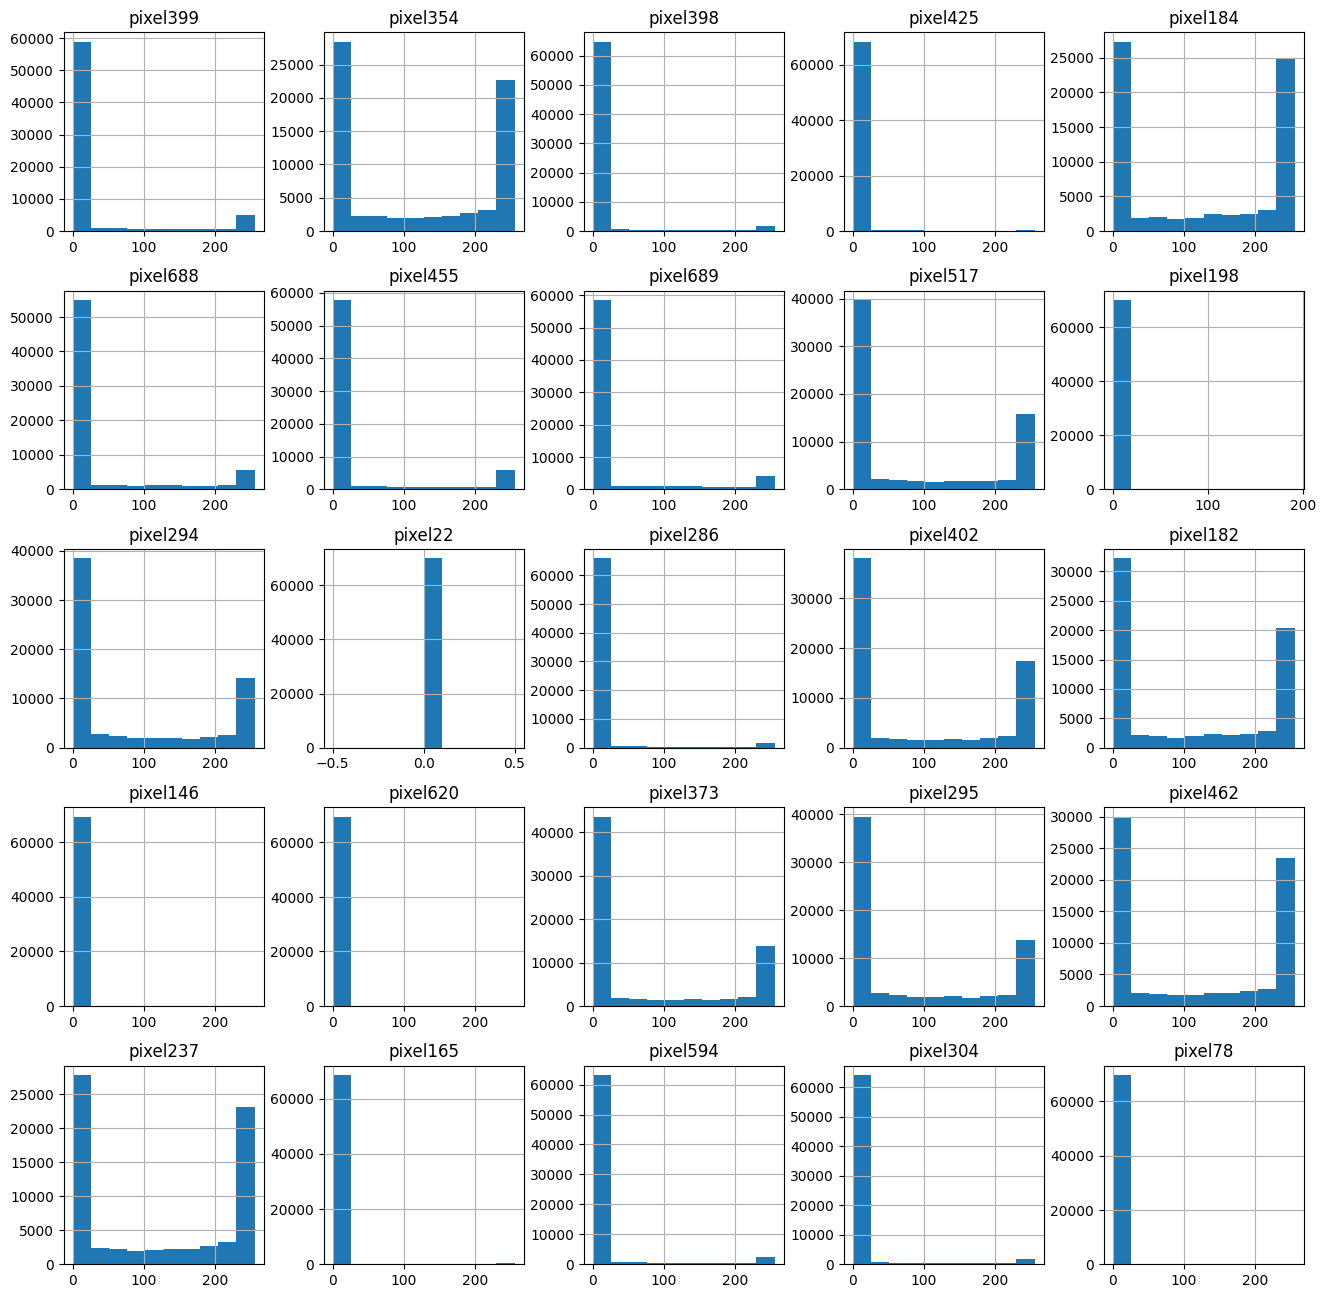

In [6]:
lista_columnas = random.sample(range(0, 784), 25,)
base_mnist.data.iloc[:,lista_columnas].hist(figsize=(16,16))
plt.show()

 Lo anterior se puede complementar con  un análisis estadístico de la información. Esto  puede ayudar a comprender la composición por cada una de las columnas (784 pixeles). Dado que se cuenta con muchas columnas se muestra un análisis estdístico de los promedios de la información con los criterios estadísiticos más usuales.

In [7]:
pd.DataFrame(base_mnist.data.describe().mean(axis = 1), columns=["Promedio"])


,Promedio
count,70000.000000
mean,33.385965
std,49.255704
min,0.000000
25%,0.000000
50%,12.267857
75%,62.571429
max,220.459184


De cara a las etapas posteriores, es importante evaluar si se encuentran Outliers dentro de la muestra. Esto se verifica con la ayuda de un boxplot, donde se podrá apreciar que el comportamiento de los datos está correctamente representado en los histogramas.

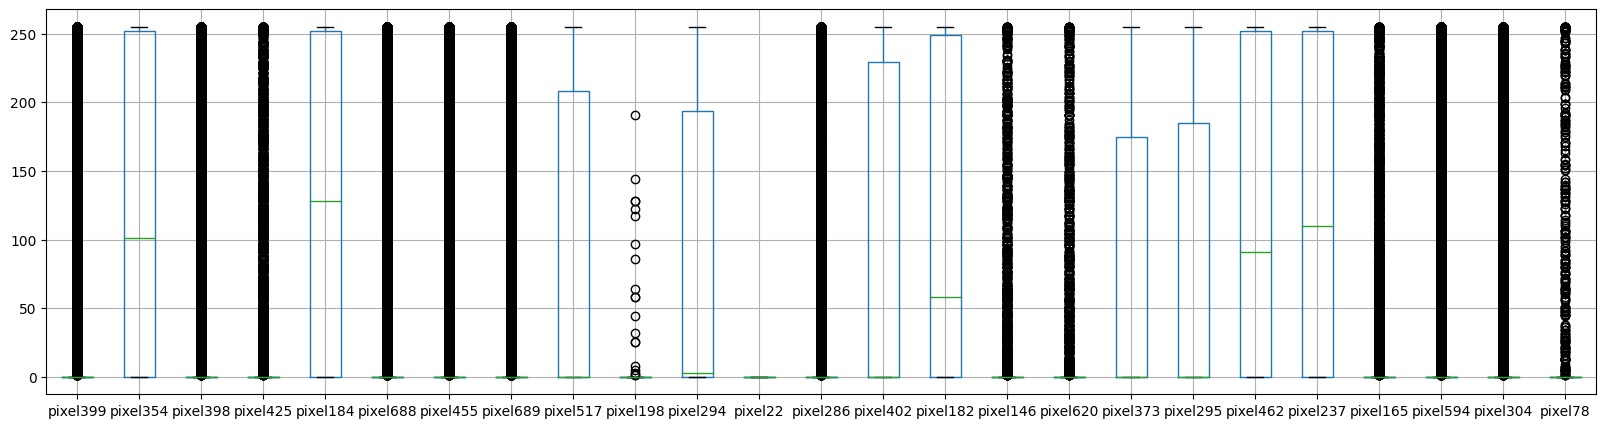

In [8]:
base_mnist.data.iloc[:,lista_columnas].boxplot(figsize=(20,5))
plt.show()

# 3. Comprobaciones adicionales y balanceo de los datos

De cara a la realización de este ejercicio, es necesario hacer una serie de comprobaciones adicionales, entre ellas la verificación de independencia de las variables por medio de una matriz de correlaciones apoyado del cálculo del determinante, como se muestra a continuación:

In [9]:
base_mnist_sin_repetidos = base_mnist.data[base_mnist.data.var()[base_mnist.data.var() != 0].index]
matriz_correlaciones = base_mnist_sin_repetidos.corr()
matriz_correlaciones
#Determinante de la matriz
np.linalg.det(matriz_correlaciones.to_numpy())

0.0

Arriba se puede ver que el determinante es cercano a cero, por lo tanto hay evidencia de que existen variables correlacionadas, esto se explica porque en una imagen el valor de un pixel puede depender de los valores de los pixeles vecinos. Lo anterior se puede solventar con un ejercicio de balanceo de los datos, incluso si existen etiquetas con un porcentaje de presencia similar en la base de datos como se puede ver más abajo

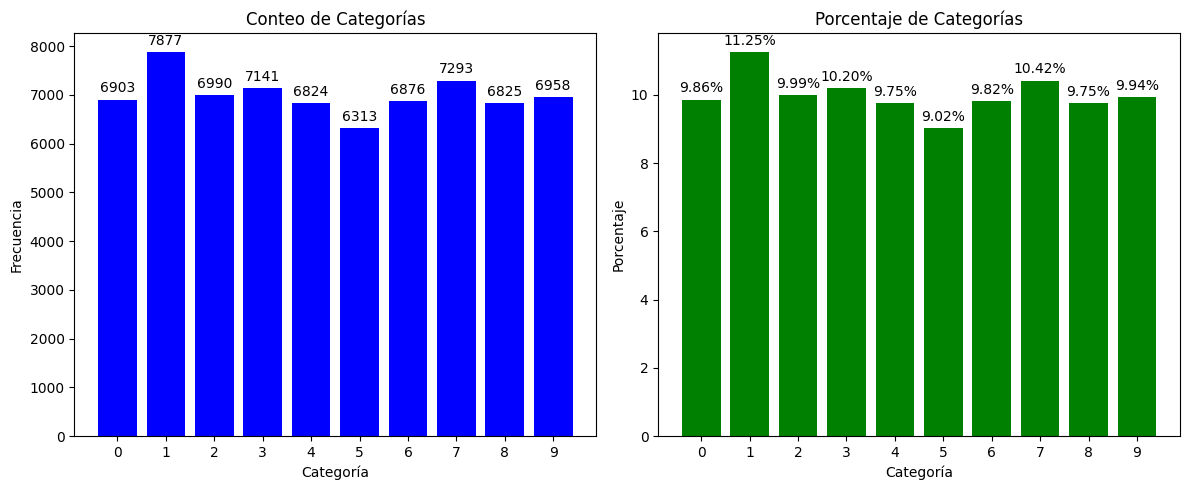

In [10]:

conteo_categorias = base_mnist.target.value_counts().sort_index()
porcentajes = (conteo_categorias / len(base_mnist.target)) * 100


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 fila y 2 columnas de subplots


bars1 = axes[0].bar(conteo_categorias.index, conteo_categorias, color='blue')
axes[0].set_title('Conteo de Categorías')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Frecuencia')


for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')


bars2 = axes[1].bar(porcentajes.index, porcentajes, color='green')
axes[1].set_title('Porcentaje de Categorías')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Porcentaje')


for bar in bars2:
    height = bar.get_height()
    axes[1].annotate(f'{height:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom', rotation=0)


plt.tight_layout()

plt.show()

Como se mencionó, el balanceo de datos se realizará para este ejercicio. Esto se hará mediante el método subsampling que permite realizar un muestreo de cada clase con el tamaño o cantidad de datos de la clase o categoría minoritaria que para este caso es el número 5.

In [11]:

df_mnist = pd.concat([base_mnist.data, base_mnist.target], axis = 1)
df_mnist


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [12]:
from sklearn.utils import resample

min_muestras = df_mnist['class'].value_counts().min()

df_mnist_balanceado = pd.DataFrame()


for categoria in df_mnist['class'].unique():
    categoria_df = df_mnist[df_mnist['class'] == categoria]
    muestras_equilibradas = resample(categoria_df, replace=True, n_samples=min_muestras, random_state=42)
    df_mnist_balanceado = pd.concat([df_mnist_balanceado, muestras_equilibradas])



El resultado del balanceo se puede ver a continuación:

In [13]:
df_mnist_balanceado['class'].value_counts()


0    6313
1    6313
2    6313
3    6313
4    6313
5    6313
6    6313
7    6313
8    6313
9    6313
Name: class, dtype: int64

In [14]:
#División del dataframe balanceado

df_mnist_balanceado_data = df_mnist_balanceado.iloc[:,0:-1]
df_mnist_balanceado_target = df_mnist_balanceado.iloc[:,-1]

# 4. Modelo de entrenamiento y clasificación usando Naive Bayes

La vision general de los datos permite ver que la información disponible está divida en dos conjuntos, uno de entrenamiento con divisiones por X e Y. Una vez se tiene la data en el formato deseado, ya se puede usar el algorítmo Naive Bayes. Entonces, el próximo paso es entrenar un modelo Naive Bayes utilizando los insumos que se muestran a continuación.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_mnist_balanceado_data, df_mnist_balanceado_target, test_size = 1/7.0, random_state = 1)

Es importante en este punto determinar si existe correlación entre las variables, para eso se usa un análisis de componentes principales de acuerdo al subconjunto de entrenamiento.

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
train_x = pca.transform(X_train)
test_x = pca.transform(X_test)

Se utilizará el modelo de clasificación en los conjuntos de datos originales de entrenamiento, así como en los conjuntos creados mediante el análisis de componentes principales (PCA). Para los conjuntos de datos generados a través del PCA, se empleará un modelo de Gaussian Naive Bayes, ya que las variables toman valores continuos como resultado de la transformación. Por otro lado, se aplicará un modelo de Bernoulli Naive Bayes a los valores originales, dado que estos son números enteros.El modelo resultante de los datos transformados por PCA se denominará "model_PCA".

Por otro lado, para los datos originales se creará un modelo Bernoulli Naive Bayes que llevará el nombre de "model_original"

In [19]:
from sklearn.naive_bayes import GaussianNB
model_PCA = GaussianNB()
model_PCA.fit(train_x, y_train)

GaussianNB()

In [25]:
from sklearn.naive_bayes import BernoulliNB
#Estimación del segundo modelo
model_original = BernoulliNB()
model_original.fit(X_train, y_train)

BernoulliNB()

# 5. Medición de desempeño

Para evaluar el desempeño, se hará un comparativo entre los dos modelos generados (PCA y Bernoulli) usando las métricas que se exponen a contnuación.

Empezamos con el modelo Gaussian usado para PCA.

In [22]:
from sklearn.metrics import classification_report

#Cálculo de las métricas para el primer modelo
y_pred = model_PCA.predict(test_x)

reporte = classification_report(y_test, y_pred, target_names= y_test.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       947
           3       0.98      0.94      0.96       927
           7       0.66      0.87      0.75       883
           1       0.84      0.82      0.83       896
           6       0.88      0.82      0.85       901
           5       0.79      0.80      0.80       911
           8       0.94      0.88      0.91       874
           9       0.89      0.82      0.85       854
           2       0.85      0.83      0.84       912
           4       0.78      0.82      0.80       914

    accuracy                           0.85      9019
   macro avg       0.86      0.85      0.85      9019
weighted avg       0.86      0.85      0.85      9019



Ahora sigue el modelo Bernoulli para los datos originales

In [26]:
y_pred = model_original.predict(X_test)

reporte = classification_report(y_test, y_pred, target_names= y_test.unique())
print(reporte)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       947
           3       0.86      0.96      0.91       927
           7       0.86      0.84      0.85       883
           1       0.74      0.78      0.76       896
           6       0.83      0.80      0.81       901
           5       0.80      0.68      0.74       911
           8       0.90      0.90      0.90       874
           9       0.91      0.85      0.88       854
           2       0.77      0.74      0.76       912
           4       0.72      0.83      0.77       914

    accuracy                           0.83      9019
   macro avg       0.83      0.83      0.83      9019
weighted avg       0.83      0.83      0.83      9019



Los resultados permiten evidenciar que el modelo con mejor desempeño es el Naive Bayes Gaussiano con una precisión del 85%, de manera que se selecciona este modelo sobre el Bernoulli.

Para dar seguimiento al proceso de medición de desempeño, se ilustra un proceso de predicciones a los dos modelos:

In [28]:
pred_y = model_PCA.predict(test_x)
pred_y


array(['0', '3', '9', ..., '1', '7', '6'], dtype='<U1')

In [29]:
pred_y_2 = model_original.predict(X_test)
pred_y_2

array(['0', '3', '1', ..., '1', '7', '6'], dtype='<U1')

# 6. Modelo de generación de dígitos

Finalmente, la fase final se basa en los resultados recien obtenidos para la construcción de un  modelo que genere números aleatorios e imágenes:


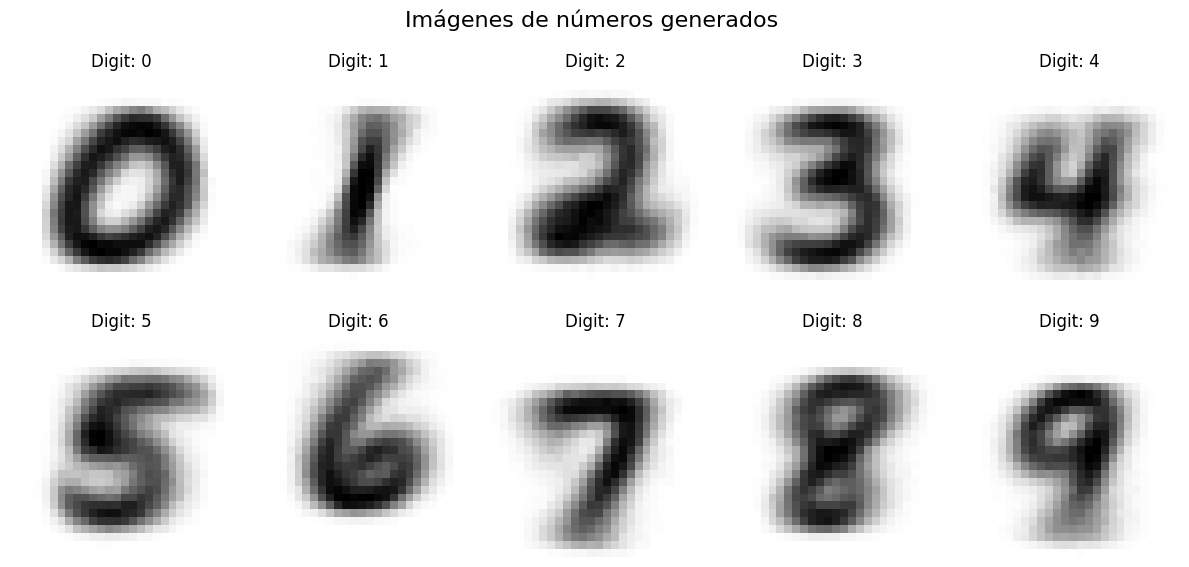

In [35]:
fig, axs = plt.subplots(2, 5, figsize=(12, 6))
probability = np.exp(model_original.feature_log_prob_)
labels = list(range(10))
# Generar y mostrar las imágenes

for i, ax in enumerate(axs.flatten()):
    # Generar una imagen binaria usando las probabilidades condicionales

    vec_generated_total = pd.DataFrame()
    for j in range(1000):
        vec_generated = np.random.binomial(1, probability[i])
        vec_generated_total[j] = vec_generated
    vec_generated_total = vec_generated_total.mean(axis = 1)

    img = np.array(vec_generated_total).reshape((28, 28))

    # Mostrar la imagen en escala de grises invertida (cmap="gray_r")
    ax.imshow(img, cmap="gray_r")

    # Configurar título y etiquetas de ejes
    ax.set_title(f"Digit: {labels[i]}")
    ax.axis("off")  # Ocultar los ejes

# Título general
plt.suptitle("Imágenes de números generados ", fontsize=16)

# Ajustar el espaciado entre subfiguras
plt.tight_layout()

# Mostrar la figura

